In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
r_df = pd.read_csv('/content/Reactions.csv')
r_df.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [3]:
c_df = pd.read_csv('/content/Content.csv')
c_df.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [4]:
rt_df = pd.read_csv('/content/ReactionTypes.csv')
rt_df.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [5]:
# Remove Null Value from Reaction
r_df.dropna(subset=['Type', 'Datetime', 'Content ID','User ID'], inplace=True)
r_df.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
5,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58


In [6]:
r_df.dtypes

Unnamed: 0     int64
Content ID    object
User ID       object
Type          object
Datetime      object
dtype: object

In [7]:
r_df['Type'] = r_df['Type'].astype(str)
r_df['Datetime'] = pd.to_datetime(r_df['Datetime'])
r_df['Content ID'] = r_df['Content ID'].astype(str)

In [ ]:
r_df.dtypes

Unnamed: 0             int64
Content ID            object
User ID               object
Type                  object
Datetime      datetime64[ns]
dtype: object

In [8]:
c_df.dropna(subset=['Content ID', 'Category', 'Type'], inplace=True)
c_df.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [9]:
c_df.dtypes

Unnamed: 0     int64
Content ID    object
User ID       object
Type          object
Category      object
URL           object
dtype: object

In [10]:
rt_df.dropna(subset=['Type', 'Score'], inplace=True)
rt_df.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [11]:
rt_df.dtypes


Unnamed: 0     int64
Type          object
Sentiment     object
Score          int64
dtype: object

In [12]:
# Clean Reaction Types Data Set
rt_df.dropna(subset=['Type', 'Score'], inplace=True)
rt_df['Type'] = rt_df['Type'].astype(str)
rt_df['Score'] = rt_df['Score'].astype(float)

rt_df = rt_df[['Type', 'Score']]
rt_df.head()

,Type,Score
0,heart,60.0
1,want,70.0
2,disgust,0.0
3,hate,5.0
4,interested,30.0


In [13]:
r_df.drop(columns=['User ID'], inplace=True)

# Remove 'User ID' column from Content Data Set
c_df.drop(columns=['User ID'], inplace=True)


In [14]:
r_df.head()
r_df.dtypes

Unnamed: 0             int64
Content ID            object
Type                  object
Datetime      datetime64[ns]
dtype: object

In [15]:
c_df.head()

,Unnamed: 0,Content ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [16]:
#Chnage the column name from Type to reaction_type
rt_df.rename(columns={'reaction_type':'Type'}, inplace=True)
rt_df.head()

,Type,Score
0,heart,60.0
1,want,70.0
2,disgust,0.0
3,hate,5.0
4,interested,30.0


In [17]:
merged_df = r_df.merge(c_df[['Content ID', 'Category', 'Type']], on='Content ID')


In [18]:
print(r_df.columns)
print(c_df.columns)
print(rt_df.columns)

Index(['Unnamed: 0', 'Content ID', 'Type', 'Datetime'], dtype='object')
Index(['Unnamed: 0', 'Content ID', 'Type', 'Category', 'URL'], dtype='object')
Index(['Type', 'Score'], dtype='object')


In [19]:
merged_df = r_df.merge(c_df[['Content ID', 'Category', 'URL']], on='Content ID', how='left')
merged_df = merged_df.merge(rt_df, on='Type', how='left')

In [20]:
# merged_df = merged_df.merge(rt_df[['Type','Score']], on='Type')
# print(merged_df.columns)
merged_df.head()

,Unnamed: 0,Content ID,Type,Datetime,Category,URL,Score
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,Studying,https://socialbuzz.cdn.com/content/storage/975...,0.0
1,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,Studying,https://socialbuzz.cdn.com/content/storage/975...,10.0
2,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,Studying,https://socialbuzz.cdn.com/content/storage/975...,15.0
3,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,Studying,https://socialbuzz.cdn.com/content/storage/975...,0.0
4,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,Studying,https://socialbuzz.cdn.com/content/storage/975...,30.0


In [21]:
popularity_scores = merged_df.groupby('Category')['Score'].sum().reset_index()
top_5_categories = popularity_scores.sort_values(by='Score', ascending=False).head(5)

In [ ]:
print(top_5_categories)

          Category    Score
24         animals  63544.0
31  healthy eating  62866.0
36      technology  61879.0
33         science  60575.0
25         cooking  58530.0


In [22]:
merged_df.to_csv('final_dataset.csv', index=False)

In [23]:
top_5_categories.to_csv('top_5_categories.csv', index=False)

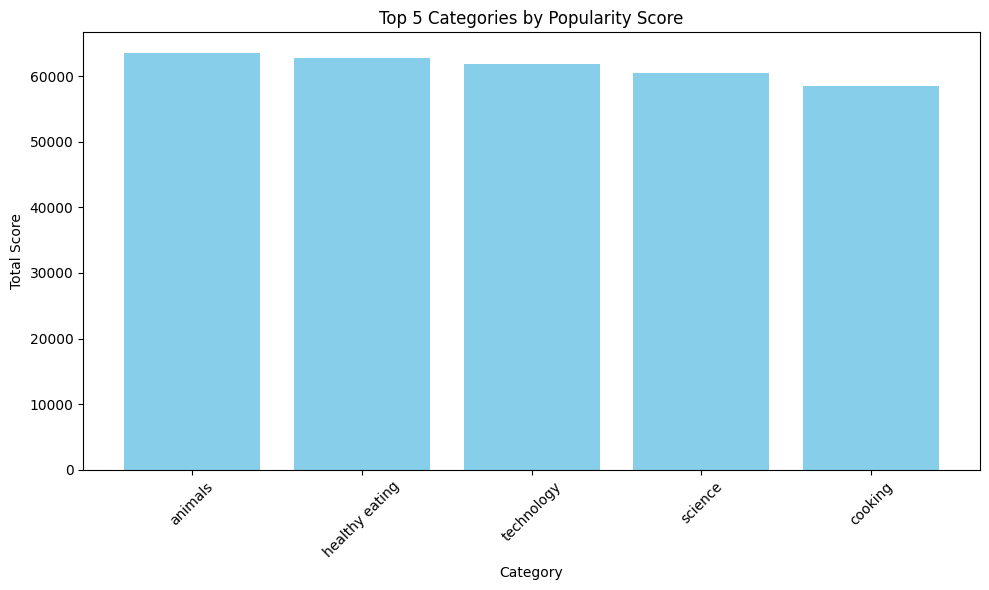

In [28]:

# Bar chart for top 5 categories by score
plt.figure(figsize=(10, 6))
plt.bar(top_5_categories['Category'], top_5_categories['Score'], color='skyblue')
plt.title('Top 5 Categories by Popularity Score')
plt.xlabel('Category')
plt.ylabel('Total Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_5_categories_bar_chart.png')
plt.show()

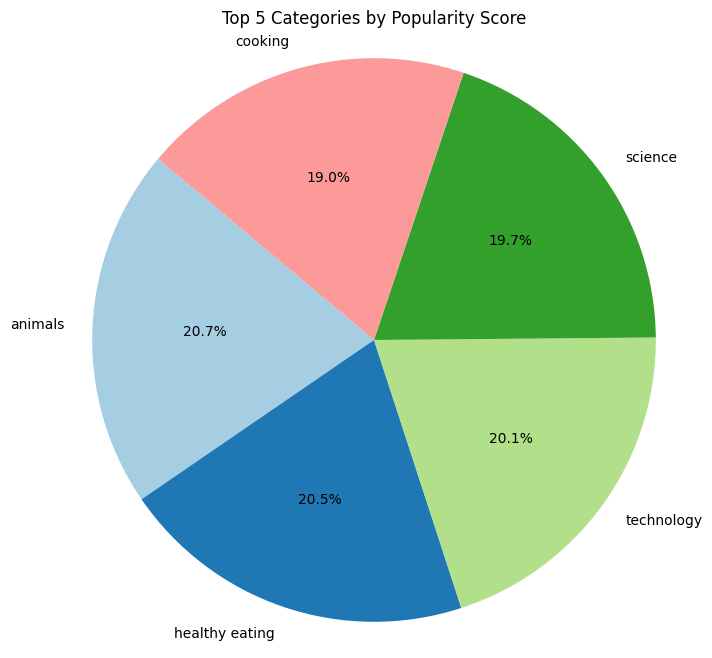

In [27]:
# Pie chart for top 5 categories
plt.figure(figsize=(8, 8))
plt.pie(top_5_categories['Score'], labels=top_5_categories['Category'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 5 Categories by Popularity Score')
plt.axis('equal')
plt.savefig('top_5_categories_pie_chart.png')
plt.show()